**In this notebook:** 
    
    - we generate a set of 10,000 synthetic contact matrices
    - we compute the dominant eigenvalue and the assortativity index (SEP and education dimensions)
    - we save the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import cm
import math
import random

import geopandas as gp 
from shapely.geometry import Point, LineString

import datetime as dt

import time

import scipy.stats as st

import seaborn as sns

from numpy import linalg as LA

# population

In [2]:
# # read population data

data_pop_grouped = pd.read_csv("./../data/pop_size_by_age_SEP_edu.csv")

dict_pop_full = dict(zip(data_pop_grouped[['age_group',
                           'sep_level', 'edu_level']].apply(lambda x:
                                               x[0]+", "+x[1]+", "+x[2], axis=1).values,
                   data_pop_grouped['population']))
                   
pop_age = data_pop_grouped.groupby('age_group')['population'].sum()
pop_age = dict(zip(pop_age.index, pop_age.values))

distrib_pop = data_pop_grouped.groupby('age_group')['population'].sum()/data_pop_grouped['population'].sum()
distrib_pop = dict(zip(distrib_pop.index, distrib_pop.values))

# selected parameter combinations 

In [3]:
df_qs_0 = pd.read_csv('./parameter_space_exploration/df_qs_0_seed29_10000.csv', header=0)

df_qs_0.tail()

,q_sep
9995,0.556589
9996,0.003038
9997,0.731657
9998,0.661948
9999,0.188450


In [4]:
df_qs_1 = pd.read_csv('./parameter_space_exploration/df_qs_1_seed29_2000000_constrained.csv', header=0)

df_qs_1.tail()

,q11,q12,q21,q22,q_sep,q_edu
3594,0.837517,0.039378,0.942691,0.258143,0.847486,0.949661
3595,0.129947,0.117123,0.447183,0.337318,0.168843,0.946738
3596,0.271175,0.682445,0.556009,0.096171,0.350947,0.952279
3597,0.876495,0.601172,0.900633,0.261413,0.863449,0.965194
3598,0.418588,0.138669,0.724249,0.684707,0.553952,0.952812


In [5]:
df_qs_2 = pd.read_csv('./parameter_space_exploration/df_qs_2_seed29_2000000_constrained.csv', header=0)

df_qs_2.tail()

,q11,q12,q21,q22,q_sep,q_edu
35084,0.083299,0.381777,0.590255,0.661799,0.566293,0.644221
35085,0.306844,0.323340,0.312937,0.395531,0.694671,0.477533
35086,0.053065,0.359665,0.629779,0.608424,0.247684,0.756418
35087,0.000682,0.025324,0.379344,0.360840,0.305186,0.446756
35088,0.301793,0.440056,0.624330,0.649599,0.430269,0.697945


In [6]:
df_qs_3 = pd.read_csv('./parameter_space_exploration/df_qs_3_seed29_2000000_constrained.csv', header=0)

df_qs_3.tail()

,q11,q12,q21,q22,q_sep,q_edu
20906,0.052361,0.039547,0.441443,0.374455,0.226229,0.692388
20907,0.633015,0.314284,0.491281,0.015629,0.571493,0.703707
20908,0.058473,0.251593,0.551927,0.097859,0.330012,0.649710
20909,0.037974,0.248614,0.358874,0.665195,0.171316,0.813152
20910,0.288378,0.552829,0.440284,0.274423,0.435085,0.730770


In [7]:
df_qs_12 = pd.read_csv('./parameter_space_exploration/df_qs_12_seed29_2000000_constrained.csv', header=0)

df_qs_12.tail()

,q11,q12,q21,q22,r1,r2,r3,q_sep,q_edu
148,0.268679,0.103757,0.372931,0.709542,0.324895,0.643554,0.746114,0.480823,0.565553
149,0.450871,0.353008,0.501877,0.264942,0.238439,0.064462,0.839797,0.599379,0.545116
150,0.153514,0.180121,0.207713,0.053202,0.151563,0.154239,0.649929,0.305072,0.531817
151,0.538374,0.008780,0.467976,0.044989,0.564669,0.076230,0.969468,0.697278,0.556933
152,0.222727,0.121993,0.301767,0.438778,0.087924,0.684122,0.640768,0.291009,0.554480


In [8]:
df_qs_23 = pd.read_csv('./parameter_space_exploration/df_qs_23_seed29_2000000_constrained.csv', header=0)

df_qs_23.tail()

,q11,q12,q21,q22,r1,r2,r3,q_sep,q_edu
682,0.402750,0.182506,0.409622,0.288744,0.198442,0.470629,0.378458,0.511526,0.671049
683,0.259009,0.287308,0.240012,0.000796,0.074556,0.040760,0.528579,0.472292,0.572695
684,0.570692,0.121296,0.755630,0.304080,0.359832,0.001765,0.866003,0.625832,0.780011
685,0.100103,0.028243,0.752287,0.151728,0.088274,0.224929,0.227937,0.190245,0.730853
686,0.364668,0.016728,0.526577,0.075895,0.169998,0.596765,0.722369,0.386963,0.535110


In [9]:
df_qs_13 = pd.read_csv('./parameter_space_exploration/df_qs_13_seed29_2000000_constrained.csv', header=0)

df_qs_13.tail()

,q11,q12,q21,q22,r1,r2,r3,q_sep,q_edu
210,0.370215,0.052336,0.627550,0.025688,0.076249,0.700064,0.520401,0.340490,0.589655
211,0.256164,0.477950,0.754517,0.011651,0.185881,0.450720,0.931753,0.475584,0.592252
212,0.274949,0.333964,0.605252,0.023995,0.228549,0.008485,0.985266,0.447342,0.649693
213,0.275720,0.047651,0.692770,0.552003,0.221278,0.174310,0.839303,0.479509,0.640982
214,0.254130,0.137781,0.624345,0.488875,0.104399,0.235745,0.689770,0.409597,0.616759


In [10]:
df_qs_01 = pd.read_csv('./parameter_space_exploration/df_qs_01_seed29_2000000.csv', header=0)

df_qs_01.tail()

,q11,q21,q_sep
7080,0.784664,0.757705,0.785897
7081,0.787261,0.799551,0.903268
7082,0.437438,0.654798,0.546549
7083,0.253405,0.524307,0.285500
7084,0.520266,0.685781,0.637659


In [11]:
df_qs_02 = pd.read_csv('./parameter_space_exploration/df_qs_02_seed29_2000000.csv', header=0)

df_qs_02.tail()

,q11,q21,q_sep
105522,0.025879,0.197993,0.161118
105523,0.141707,0.215050,0.179683
105524,0.467904,0.341786,0.530401
105525,0.454476,0.446529,0.573185
105526,0.040007,0.281400,0.196512


In [12]:
df_qs_03 = pd.read_csv('./parameter_space_exploration/df_qs_03_seed29_2000000.csv', header=0)

df_qs_03.tail()

,q11,q21,q_sep
61210,0.174025,0.007071,0.199863
61211,0.355378,0.183800,0.367362
61212,0.064972,0.280383,0.082447
61213,0.149679,0.279198,0.223389
61214,0.148288,0.340345,0.192294


# read intermediate matrix

In [13]:
intermediate_matrix_rec = pd.read_csv("./../output/matrices/intermediate_matrix_rec.csv", index_col = 0)
intermediate_matrix_rec = intermediate_matrix_rec.fillna(0)

# define functions with linear equations

## diagonal blocks

In [14]:
def diag_block_children(age, q1_sep):

    #age = '0-14'

    tag_11 = ', low SEP, low edu'
    tag_12 = ', low SEP, high edu'
    tag_21 = ', high SEP, low edu'
    tag_22 = ', high SEP, high edu'

    # 16 unknowns
    # 4 conditions on the sum per row
    # 6 conditions on the reciprocity
    # 4 conditions on the assortativity on the diagonal
    # 1 condition on the assortativity in the edu dimension
    # 1 condition on the assortativity in the sep dimension

    a = np.array([[1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  #[0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.], ## sum
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.], ## sum
                  [0., 0., 1., 0.,  
                   0., 0., 0., 0.,  
                   -1., 0., 0., 0.,  
                   0., 0., 0., 0.], ## reciprocity
                  #[1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity 1st row
                  ###[0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity 2nd row
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.], ## assortativity 3rd row
                  ###[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.], ## assortativity 4th row
                  [1., 1., 0., 0.,  
                   1., 1., 0., 0.,  
                   0., 0., 0., 0.,  
                   0., 0., 0., 0.], ## assortativity sep dimension
                   #### null values
                  [0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.],
                 ])## assortativity
    b = np.array([intermediate_matrix_rec.loc[age+tag_11][age]*dict_pop_full[age+tag_11], 
                  #intermediate_matrix_rec.iloc[0:4][age].iloc[1],
                  intermediate_matrix_rec.loc[age+tag_21][age]*dict_pop_full[age+tag_21],
                  #intermediate_matrix_rec.iloc[0:4][age].iloc[3],
                  0., #0., 0., 0., 0., 0., 
                  #q111*intermediate_matrix_rec.iloc[0:4][age].iloc[0],
                  #q112*intermediate_matrix_rec.iloc[0:4][age].iloc[1],
                  #q121*intermediate_matrix_rec.iloc[0:4][age].iloc[2],
                  #q122*intermediate_matrix_rec.iloc[0:4][age].iloc[3],
                  q1_sep*(dict_pop_full[age+tag_11]*intermediate_matrix_rec.loc[age+tag_11][age]+dict_pop_full[age+tag_12]*intermediate_matrix_rec.loc[age+tag_12][age]),
                  #q1_edu*(dict_pop_full[age+tag_11]*intermediate_matrix_rec.iloc[0:4][age].iloc[0]+dict_pop_full[age+tag_21]*intermediate_matrix_rec.iloc[0:4][age].iloc[2])
                  ### null values
                  0., 0., 
                  0., 0., 0., 0., 
                  0., 0.,
                  0., 0., 0., 0.])

    x = np.linalg.solve(a, b)
    
    return x

In [15]:
def diag_block_age(age, q11, q12, q21, q22, q_sep, q_edu):

    #age = '15-24'

    tag_11 = ', low SEP, low edu'
    tag_12 = ', low SEP, high edu'
    tag_21 = ', high SEP, low edu'
    tag_22 = ', high SEP, high edu'

    # 16 unknowns
    # 4 conditions on the sum per row
    # 6 conditions on the reciprocity
    # 4 conditions on the assortativity on the diagonal
    # 1 condition on the assortativity in the edu dimension
    # 1 condition on the assortativity in the sep dimension

    a = np.array([[1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.], ## sum
                  [0., 1., 0., 0.,
                   -1., 0., 0., 0.,
                   0., 0., 0., 0.,
                   0., 0., 0., 0.], ## reciprocity
                  [0., 0., 1., 0.,
                   0., 0., 0., 0.,
                   -1., 0., 0., 0.,
                   0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 1.,
                   0., 0., 0., 0.,
                   0., 0., 0., 0.,
                   -1., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,
                   0., 0., 1., 0.,
                   0., -1., 0., 0.,
                   0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,
                   0., 0., 0., 1.,
                   0., 0., 0., 0.,
                   0., -1., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,
                   0., 0., 0., 0.,
                   0., 0., 0., 1.,
                   0., 0., -1., 0.], ## reciprocity
                  [1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity 1st row
                  [0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity 2nd row
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.], ## assortativity 3rd row
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.], ## assortativity 4th row
                  [1., 1., 0., 0.,
                   1., 1., 0., 0.,
                   0., 0., 0., 0.,
                   0., 0., 0., 0.], ## assortativity sep dimension
                  [1., 0., 1., 0.,
                   0., 0., 0., 0.,
                   1., 0., 1., 0.,
                   0., 0., 0., 0.], ## assortativity edu dimension


                 ])## assortativity
    b = np.array([intermediate_matrix_rec.loc[age+tag_11][age]*dict_pop_full[age+tag_11],
                  intermediate_matrix_rec.loc[age+tag_12][age]*dict_pop_full[age+tag_12],
                  intermediate_matrix_rec.loc[age+tag_21][age]*dict_pop_full[age+tag_21],
                  intermediate_matrix_rec.loc[age+tag_22][age]*dict_pop_full[age+tag_22],
                  0., 0., 0., 0., 0., 0.,
                  q11*intermediate_matrix_rec.loc[age+tag_11][age]*dict_pop_full[age+tag_11],
                  q12*intermediate_matrix_rec.loc[age+tag_12][age]*dict_pop_full[age+tag_12],
                  q21*intermediate_matrix_rec.loc[age+tag_21][age]*dict_pop_full[age+tag_21],
                  q22*intermediate_matrix_rec.loc[age+tag_22][age]*dict_pop_full[age+tag_22],
                  q_sep*(dict_pop_full[age+tag_11]*intermediate_matrix_rec.loc[age+tag_11][age]+dict_pop_full[age+tag_12]*intermediate_matrix_rec.loc[age+tag_12][age]),
                  q_edu*(dict_pop_full[age+tag_11]*intermediate_matrix_rec.loc[age+tag_11][age]+dict_pop_full[age+tag_21]*intermediate_matrix_rec.loc[age+tag_21][age])])

    x = np.linalg.solve(a, b)
    
    return x

## off diagonal blocks

In [16]:
def offdiag_block_children(age_i, age_j, q11, q21, q12_sep):

    #age_i = '0-14'
    #age_j = '15-24'

    tag_11 = ', low SEP, low edu'
    tag_12 = ', low SEP, high edu'
    tag_21 = ', high SEP, low edu'
    tag_22 = ', high SEP, high edu'

    a = np.array([[1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  #[0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.], ## sum

                  [1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal
                  #[0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal

                  #[0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## subassortatitivy
                  #[0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## subassortatitivy
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## subassortatitivy


                [1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   -1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  -1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  -1., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  -1., 0., 0., 0.], ## reciprocity

                #[0., 0., 0., 0.,  dict_pop_full[age_i+tag_12], 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                #   0., -dict_pop_full[age_j+tag_11], 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                #  [0., 0., 0., 0.,  0., dict_pop_full[age_i+tag_12], 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                #   0., 0., 0., 0.,  0., -dict_pop_full[age_j+tag_12], 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                #  [0., 0., 0., 0.,  0., 0., dict_pop_full[age_i+tag_12], 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                #   0., 0., 0., 0.,  0., 0., 0., 0.,  0., -dict_pop_full[age_j+tag_21], 0., 0.,  0., 0., 0., 0.], ## reciprocity
                #  [0., 0., 0., 0.,  0., 0., 0., dict_pop_full[age_i+tag_12],  0., 0., 0., 0.,  0., 0., 0., 0.,
                #   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., -dict_pop_full[age_j+tag_22], 0., 0.], ## reciprocity

                [0., 0., 0., 0.,  0., 0., 0., 0., 1., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., -1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., -1.,  0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., -1., 0.,  0., 0., 0., 0.], ## reciprocity
                #  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., dict_pop_full[age_i+tag_21],  0., 0., 0., 0.,
                #   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., -dict_pop_full[age_j+tag_22], 0.], ## reciprocity

                #  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  dict_pop_full[age_i+tag_22], 0., 0., 0.,
                #   0., 0., 0., -dict_pop_full[age_j+tag_11],  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                #  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., dict_pop_full[age_i+tag_22], 0., 0.,
                #   0., 0., 0., 0.,  0., 0., 0., -dict_pop_full[age_j+tag_12],  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                #  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., dict_pop_full[age_i+tag_22], 0.,
                #   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., -dict_pop_full[age_j+tag_21],  0., 0., 0., 0.], ## reciprocity
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., dict_pop_full[age_i+tag_22],
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., -dict_pop_full[age_j+tag_22]], ## reciprocity

                 [1., 1., 0., 0.,
                   1., 1., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity sep dimension
                 # [dict_pop_full[age_i+tag_11], 0., dict_pop_full[age_i+tag_11], 0.,
                 #  0., 0., 0., 0.,
                 #  dict_pop_full[age_i+tag_21], 0., dict_pop_full[age_i+tag_21], 0.,
                 #  0., 0., 0., 0.,
                 #  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity edu dimension
                 ### null values
                  [0., 0., 0., 0.,  1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.],
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.],
               ],
                )

    b = np.array([intermediate_matrix_rec.loc[age_i+tag_11][age_j]*dict_pop_full[age_i+tag_11],
                  #intermediate_matrix_rec.iloc[0:4][age_j].iloc[1],
                  intermediate_matrix_rec.loc[age_i+tag_21][age_j]*dict_pop_full[age_i+tag_21],
                  #intermediate_matrix_rec.iloc[0:4][age_j].iloc[3],
                  intermediate_matrix_rec.loc[age_j+tag_11][age_i]*dict_pop_full[age_j+tag_11],
                  intermediate_matrix_rec.loc[age_j+tag_12][age_i]*dict_pop_full[age_j+tag_12],
                  intermediate_matrix_rec.loc[age_j+tag_21][age_i]*dict_pop_full[age_j+tag_21],
                  intermediate_matrix_rec.loc[age_j+tag_22][age_i]*dict_pop_full[age_j+tag_22],
                  q11*intermediate_matrix_rec.loc[age_i+tag_11][age_j]*dict_pop_full[age_i+tag_11],
                  #q12*intermediate_matrix_rec.iloc[0:4][age_j].iloc[1],
                  q21*intermediate_matrix_rec.loc[age_i+tag_21][age_j]*dict_pop_full[age_i+tag_21],
                  #q22*intermediate_matrix_rec.iloc[0:4][age_j].iloc[3],
                  #r1*(1.-q11)*intermediate_matrix_rec.iloc[0:4][age_j].iloc[0],
                  #r2*(1.-q12)*intermediate_matrix_rec.iloc[0:4][age_j].iloc[1],
                  #r3*(1.-q21)*intermediate_matrix_rec.iloc[0:4][age_j].iloc[2],
                  0., 0., 0., 0.,
                  #0., 0., 0., 0.,
                  0., 0., 0., #0.,
                  #0., 0., 0., #0.,
                  q12_sep*(dict_pop_full[age_i+tag_11]*intermediate_matrix_rec.loc[age_i+tag_11][age_j]+dict_pop_full[age_i+tag_12]*intermediate_matrix_rec.loc[age_i+tag_12][age_j]),
                  #q12_edu*(dict_pop_full[age_i+tag_11]*intermediate_matrix_rec.iloc[0:4][age_j].iloc[0]+dict_pop_full[age_i+tag_21]*intermediate_matrix_rec.iloc[0:4][age_j].iloc[2]),
                  ### null values (16)
                  0., 0., 0., 0.,
                  0., 0., 0., 0.,
                  0., 0.,
                  0., 0.,
                  0., 0.,
                  0., 0.,
                 ])

    x = np.linalg.solve(a, b)
    
    return x

In [17]:
def offdiag_block_age(age_i, age_j, q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu):

    #age_i = '15-24'
    #age_j = '25-64'

    tag_11 = ', low SEP, low edu'
    tag_12 = ', low SEP, high edu'
    tag_21 = ', high SEP, low edu'
    tag_22 = ', high SEP, high edu'

    a = np.array([[1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.,  0., 0., 0., 0.], ## sum
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 1., 1., 1.], ## sum

                  [1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal
                  [0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortatitivy subdiagonal

                 [0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## subassortatitivy
                  [0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## subassortatitivy
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## subassortatitivy


                [1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   -1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  -1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  -1., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  -1., 0., 0., 0.], ## reciprocity

                [0., 0., 0., 0.,  1., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., -1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., -1., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., -1., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., -1., 0., 0.], ## reciprocity

                [0., 0., 0., 0.,  0., 0., 0., 0.,  1., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., -1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., -1., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., -1., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 1.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., -1., 0.], ## reciprocity

                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  1., 0., 0., 0.,
                   0., 0., 0., -1.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 1., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., -1.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## reciprocity
                  [0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 1., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., -1.,  0., 0., 0., 0.], ## reciprocity
                  #[0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., dict_pop_full[age_i+tag_22],
                  # 0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., -dict_pop_full[age_j+tag_22]], ## reciprocity

                 [1., 1., 0., 0.,
                   1., 1., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity sep dimension
                  [1., 0., 1., 0.,
                   0., 0., 0., 0.,
                   1., 0., 1., 0.,
                   0., 0., 0., 0.,
                   0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.,  0., 0., 0., 0.], ## assortativity edu dimension
                  ])

    b = np.array([intermediate_matrix_rec.loc[age_i+tag_11][age_j]*dict_pop_full[age_i+tag_11],
                  intermediate_matrix_rec.loc[age_i+tag_12][age_j]*dict_pop_full[age_i+tag_12],
                  intermediate_matrix_rec.loc[age_i+tag_21][age_j]*dict_pop_full[age_i+tag_21],
                  intermediate_matrix_rec.loc[age_i+tag_22][age_j]*dict_pop_full[age_i+tag_22],
                  intermediate_matrix_rec.loc[age_j+tag_11][age_i]*dict_pop_full[age_j+tag_11],
                  intermediate_matrix_rec.loc[age_j+tag_12][age_i]*dict_pop_full[age_j+tag_12],
                  intermediate_matrix_rec.loc[age_j+tag_21][age_i]*dict_pop_full[age_j+tag_21],
                  intermediate_matrix_rec.loc[age_j+tag_22][age_i]*dict_pop_full[age_j+tag_22],
                  q11*intermediate_matrix_rec.loc[age_i+tag_11][age_j]*dict_pop_full[age_i+tag_11],
                  q12*intermediate_matrix_rec.loc[age_i+tag_12][age_j]*dict_pop_full[age_i+tag_12],
                  q21*intermediate_matrix_rec.loc[age_i+tag_21][age_j]*dict_pop_full[age_i+tag_21],
                  q22*intermediate_matrix_rec.loc[age_i+tag_22][age_j]*dict_pop_full[age_i+tag_22],
                  r1*(1.-q11)*intermediate_matrix_rec.loc[age_i+tag_11][age_j]*dict_pop_full[age_i+tag_11],
                  r2*(1.-q12)*intermediate_matrix_rec.loc[age_i+tag_12][age_j]*dict_pop_full[age_i+tag_12],
                  r3*(1.-q21)*intermediate_matrix_rec.loc[age_i+tag_21][age_j]*dict_pop_full[age_i+tag_21],
                  0., 0., 0., 0.,
                  0., 0., 0., 0.,
                  0., 0., 0., 0.,
                  0., 0., 0., #0.,
                  q_sep*(dict_pop_full[age_i+tag_11]*intermediate_matrix_rec.loc[age_i+tag_11][age_j]+dict_pop_full[age_i+tag_12]*intermediate_matrix_rec.loc[age_i+tag_12][age_j]),
                  q_edu*(dict_pop_full[age_i+tag_11]*intermediate_matrix_rec.loc[age_i+tag_11][age_j]+dict_pop_full[age_i+tag_21]*intermediate_matrix_rec.loc[age_i+tag_21][age_j]),
                 ])

    x = np.linalg.solve(a, b)
    
    return x

# test

In [18]:
h = 0

In [19]:
## diagonal block 0
q_sep = df_qs_0.iloc[h].values
x0 = diag_block_children('0-14', q_sep[0])
x0

array([ 1.41005795e+06,  0.00000000e+00,  8.89463517e+05, -0.00000000e+00,
        0.00000000e+00, -2.32830644e-10,  0.00000000e+00,  0.00000000e+00,
        8.89463517e+05, -0.00000000e+00,  4.14657082e+06,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [20]:
## diagonal block 1
q11, q12, q21, q22, q_sep, q_edu = df_qs_1.iloc[h].values
x = diag_block_age('15-24', q11, q12, q21, q22, q_sep, q_edu)
x

array([238932.89705839,  10661.38230975, 649694.13072455,  17330.96174049,
        10661.38230975,  58957.7343179 ,  27734.3790139 ,  10184.00925846,
       649694.13072455,  27734.3790139 , 789316.79584637,  72157.14707763,
        17330.96174049,  10184.00925846,  72157.14707763,  19319.55252778])

In [21]:
## block 12
q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu = df_qs_12.iloc[h].values
x = offdiag_block_age('15-24', '25-64', q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu)
x

array([ 433976.80962057,  248094.57261961,   45687.73227486,
        306428.4008584 ,   35464.56594221,   16217.75968585,
         10953.97868926,  108473.31334359,   30937.3999012 ,
         54686.78060543, 1067782.55812529,  717872.38443088,
         99865.50049805,    7489.14499037,   75371.21435886,
         21105.90031462,  433976.80962057,   35464.56594221,
         30937.3999012 ,   99865.50049805,  248094.57261961,
         16217.75968585,   54686.78060543,    7489.14499037,
         45687.73227486,   10953.97868926, 1067782.55812529,
         75371.21435886,  306428.4008584 ,  108473.31334359,
        717872.38443088,   21105.90031462])

In [22]:
## block 01
q11, q21, q_sep = df_qs_01.iloc[h].values
x01 = offdiag_block_children('0-14', '15-24', q11, q21, q_sep)

x01

array([ 5.89957927e+04,  3.27307638e+04,  1.11736720e+05,  1.07046021e+04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.85454695e+05,  1.52122450e+02,  2.79757174e+05,  1.22663677e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.89957927e+04,  0.00000000e+00,  1.85454695e+05,  0.00000000e+00,
        3.27307638e+04,  0.00000000e+00,  1.52122450e+02,  0.00000000e+00,
        1.11736720e+05,  0.00000000e+00,  2.79757174e+05, -0.00000000e+00,
        1.07046021e+04, -0.00000000e+00,  1.22663677e+03,  0.00000000e+00])

# function to generate contact matrix 

In [23]:
def generate_matrix():
    
    params = []

    ## diagonal block 1
    h = random.randint(0, len(df_qs_1)-1)
    q11, q12, q21, q22, q_sep, q_edu = df_qs_1.iloc[h].values
    x1 = diag_block_age('15-24', q11, q12, q21, q22, q_sep, q_edu)
    params.append([q11, q12, q21, q22, q_sep, q_edu])

    ## diagonal block 2
    h = random.randint(0, len(df_qs_2)-1)
    q11, q12, q21, q22, q_sep, q_edu = df_qs_2.iloc[h].values
    x2 = diag_block_age('25-64', q11, q12, q21, q22, q_sep, q_edu)
    params.append([q11, q12, q21, q22, q_sep, q_edu])

    ## diagonal block 3
    h = random.randint(0, len(df_qs_3)-1)
    q11, q12, q21, q22, q_sep, q_edu = df_qs_3.iloc[h].values
    x3 = diag_block_age('65+', q11, q12, q21, q22, q_sep, q_edu)
    params.append([q11, q12, q21, q22, q_sep, q_edu])

    ## block 12
    h = random.randint(0, len(df_qs_12)-1)
    q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu = df_qs_12.iloc[h].values
    x12 = offdiag_block_age('15-24', '25-64', q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu)
    params.append([q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu])

    ## block 13
    h = random.randint(0, len(df_qs_13)-1)
    q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu = df_qs_13.iloc[h].values
    x13 = offdiag_block_age('15-24', '65+', q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu)
    params.append([q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu])

    ## block 23
    h = random.randint(0, len(df_qs_23)-1)
    q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu = df_qs_23.iloc[h].values
    x23 = offdiag_block_age('25-64', '65+', q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu)
    params.append([q11, q12, q21, q22, r1, r2, r3, q_sep, q_edu])
    
    ## diagonal block 0
    h = random.randint(0, len(df_qs_0)-1)
    q_sep = df_qs_0.iloc[h].values
    x0 = diag_block_children('0-14', q_sep[0])        
    params.append([q_sep[0]])

    ## block 01
    h = random.randint(0, len(df_qs_01)-1)
    q11, q21, q_sep = df_qs_01.iloc[h].values
    x01 = offdiag_block_children('0-14', '15-24', q11, q21, q_sep)
    params.append([q11, q21, q_sep])

    ## block 02
    h = random.randint(0, len(df_qs_02)-1)
    q11, q21, q_sep = df_qs_02.iloc[h].values
    x02 = offdiag_block_children('0-14', '25-64',q11, q21, q_sep)
    params.append([q11, q21, q_sep])

    ## block 02
    h = random.randint(0, len(df_qs_03)-1)
    q11, q21, q_sep = df_qs_03.iloc[h].values
    x03 = offdiag_block_children('0-14', '65+',q11, q21, q_sep)
    params.append([q11, q21, q_sep])

    matrix_expanded_positive = np.zeros((16,16))

    matrix_expanded_positive[0:4,0:4] = x0.reshape(4,4)
    matrix_expanded_positive[4:8,4:8] = x1.reshape(4,4)
    matrix_expanded_positive[8:12,8:12] = x2.reshape(4,4)
    matrix_expanded_positive[12:16,12:16] = x3.reshape(4,4)

    matrix_expanded_positive[0:4,4:8] = x01.reshape(8,4)[:4]
    matrix_expanded_positive[4:8,0:4] = x01.reshape(8,4)[4:]

    matrix_expanded_positive[0:4,8:12] = x02.reshape(8,4)[:4]
    matrix_expanded_positive[8:12,0:4] = x02.reshape(8,4)[4:]

    matrix_expanded_positive[0:4,12:16] = x03.reshape(8,4)[:4]
    matrix_expanded_positive[12:16,0:4] = x03.reshape(8,4)[4:]

    matrix_expanded_positive[4:8,8:12] = x12.reshape(8,4)[:4]
    matrix_expanded_positive[8:12,4:8] = x12.reshape(8,4)[4:]

    matrix_expanded_positive[4:8,12:16] = x13.reshape(8,4)[:4]
    matrix_expanded_positive[12:16,4:8] = x13.reshape(8,4)[4:]

    matrix_expanded_positive[8:12,12:16] = x23.reshape(8,4)[:4]
    matrix_expanded_positive[12:16,8:12] = x23.reshape(8,4)[4:]

    matrix_expanded_positive = pd.DataFrame(matrix_expanded_positive)
    matrix_expanded_positive.index = intermediate_matrix_rec.index
    matrix_expanded_positive.columns = intermediate_matrix_rec.index

    matrix_expanded = matrix_expanded_positive.copy()
    
    df = matrix_expanded.values  # Convert DataFrame to NumPy array
    
    if np.allclose(df, df.T, atol=1e-8)==False: ## check symmetry of the matrix
        sys.exit()
        
    else:    
        ## this is the symmetric matrix with the total number of contacts between two groups 
        ## T_ij = M_ij*N_i = M_ji*N_j = T_ji 

        ## to compute the contact matrix of the number of contacts per participant, dived each row by the size of the 
        ## M_ij = T_ij/N_i
        
        for g in matrix_expanded.columns:
            if dict_pop_full[g]!= 0.:
                matrix_expanded.loc[g] = matrix_expanded.loc[g]/dict_pop_full[g]
            else:
                matrix_expanded.loc[g] = np.nan
        
        for g in matrix_expanded.columns:
            if dict_pop_full[g]== 0.:
                matrix_expanded[g] = np.nan
    
        return matrix_expanded, params

In [24]:
matrix_expanded, params = generate_matrix()
matrix_expanded

tag_index,"0-14, low SEP, low edu","0-14, low SEP, high edu","0-14, high SEP, low edu","0-14, high SEP, high edu","15-24, low SEP, low edu","15-24, low SEP, high edu","15-24, high SEP, low edu","15-24, high SEP, high edu","25-64, low SEP, low edu","25-64, low SEP, high edu","25-64, high SEP, low edu","25-64, high SEP, high edu","65+, low SEP, low edu","65+, low SEP, high edu","65+, high SEP, low edu","65+, high SEP, high edu"
tag_index,,,,,,,,,,,,,,,,
"0-14, low SEP, low edu",4.808977,NaN,0.756150,NaN,0.424325,0.003097,0.084255,0.006636,1.562541,0.030128,0.394462,1.396085,0.232038,0.042321,0.159123,0.051607
"0-14, low SEP, high edu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"0-14, high SEP, low edu",0.343262,NaN,5.189534,NaN,0.075936,0.034721,0.391863,0.010096,0.219535,0.564489,1.401585,1.198507,0.023064,0.018513,0.088808,0.293809
"0-14, high SEP, high edu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"15-24, low SEP, low edu",0.662253,NaN,0.261069,NaN,2.701810,0.131926,0.451359,0.177099,0.067191,0.674143,0.399593,2.765338,0.272929,0.052185,0.540383,0.102270
"15-24, low SEP, high edu",0.051551,NaN,1.273143,NaN,1.407059,1.164659,0.823615,0.936839,2.394647,1.425888,1.808132,1.264522,0.992412,0.655449,0.849090,0.449292
"15-24, high SEP, low edu",0.062997,NaN,0.645421,NaN,0.216234,0.036995,2.469403,0.062051,0.921197,0.138960,1.661823,0.664148,0.044177,0.067584,0.315522,0.276354
"15-24, high SEP, high edu",0.052920,NaN,0.177359,NaN,0.904948,0.448837,0.661843,0.280976,0.268884,0.691342,2.523441,0.450398,0.064718,0.198517,0.303973,0.622372
"25-64, low SEP, low edu",0.687775,NaN,0.212863,NaN,0.018950,0.063321,0.542301,0.014841,0.739741,0.376160,0.185014,2.267685,0.010892,0.003296,0.646218,0.193432


In [25]:
params

[[0.780375174170986,
  0.2688395185377255,
  0.8867805232488153,
  0.1223442700903473,
  0.7948706120834159,
  0.9443903925758108],
 [0.2072915885766421,
  0.0006853595264846,
  0.502009806601495,
  0.3750229992530923,
  0.2501658360778078,
  0.4367205714306039],
 [0.5428119433341653,
  0.3742011673489894,
  0.28625182263475,
  0.0035676057859325,
  0.6292512854388876,
  0.6388607633399362],
 [0.0172007173667917,
  0.2068546889784007,
  0.4907739232362381,
  0.1144866175619057,
  0.175600503012452,
  0.3307174540111687,
  0.3851687197179776,
  0.2415222279210821,
  0.5338344635467911],
 [0.2820195929239705,
  0.2224694342897275,
  0.4484157512754461,
  0.523186233428042,
  0.0751044392698432,
  0.3706532106378848,
  0.7120407255869491,
  0.3855429179835929,
  0.6419565409319995],
 [0.0127564868273962,
  0.0006477918996431,
  0.4870129181824948,
  0.2300452774890202,
  0.0039096307392448,
  0.6835743872248767,
  0.6171299797422093,
  0.0662328142074934,
  0.6341692797912961],
 [0.864127

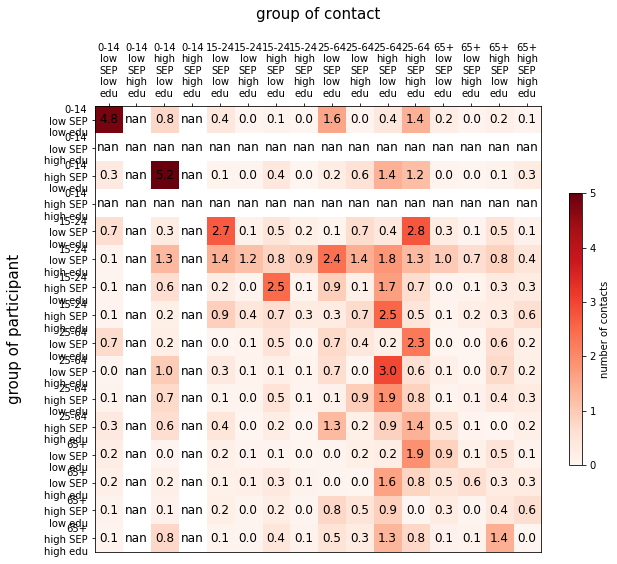

In [26]:
plt.figure(figsize=(10,10))

df_plot = matrix_expanded.copy()

# Plot heatmap using Matplotlib
plt.imshow(df_plot, 
           cmap='Reds',
           interpolation='nearest', 
           vmin=math.floor(df_plot.min().min()), vmax=math.floor(df_plot.max().max()))

# Add color bar
plt.colorbar(label='number of contacts', shrink=0.5)

# Set ticks
plt.xticks(range(len(df_plot.columns)), [c.replace(", ", "\n").replace(" ", "\n") for c in df_plot.columns])
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
plt.yticks(range(len(df_plot.index)), [c.replace(", ", "\n") for c in df_plot.index])

# Set labels and title
plt.ylabel('group of participant\n', fontsize=15)

plt.title('group of contact\n', fontsize=15)

# Add annotations
for i in range(len(df_plot.index)):
    for j in range(len(df_plot.columns)):
        plt.text(j, i, np.around(df_plot.values[i, j],1), 
                 ha='center', va='center', color='black', fontsize=12)
plt.show()

# check consistency with aggregated age-stratified matrix

In [27]:
matrix_rec = pd.read_csv("./../output/matrices/matrix_rec.csv", index_col = 0)
matrix_rec 

,0-14,15-24,25-64,65+
age_part_4cat,,,,
0-14,5.542891,0.514395,3.383834,0.443207
15-24,0.761460,3.000000,3.669290,0.872285
25-64,0.915785,0.670835,3.739023,0.817096
65+,0.347758,0.462358,2.368968,1.467081


In [28]:
avg_cnt = sum([matrix_rec.loc[g].sum()*pop_age[g] for g in matrix_rec.index])/sum(pop_age.values())
avg_cnt

6.6383909079288035

In [29]:
a = []
for age_i in matrix_rec.index:
    for age_j in matrix_rec.columns:
        idx = [h for h in matrix_expanded.index if age_i in h]
        col = [h for h in matrix_expanded.columns if age_j in h]
        sub_matrix = matrix_expanded.loc[idx][col]

        agg = sum([sub_matrix.loc[g].sum()*dict_pop_full[g] for g in sub_matrix.index])/sum([dict_pop_full[g] for g in sub_matrix.index])

        a.append(agg)

df = np.array(a).reshape(4,4)

print(np.allclose(df, matrix_rec.values, atol=1e-8))

True


# compute aggregated SEP-stratified or EDU-stratified matrix

## SEP stratified

In [30]:
def compute_M_sep(matrix_expanded):
    
    a = []
    for age_i in ['low SEP', 'high SEP']:
        for age_j in ['low SEP', 'high SEP']:
            idx = [h for h in matrix_expanded.index if age_i in h]
            col = [h for h in matrix_expanded.columns if age_j in h]
            sub_matrix = matrix_expanded.loc[idx][col]

            num = sum([sub_matrix.iloc[h].sum()*dict_pop_full[idx[h]] for h in np.arange(len(sub_matrix))])
            den = sum([dict_pop_full[idx[h]] for h in np.arange(len(sub_matrix))])
            a.append(num/den)

    M_sep = pd.DataFrame(np.array(a).reshape(2,2))

    M_sep.index = ['low SEP', 'high SEP']
    M_sep.columns = ['low SEP', 'high SEP']
    
    return M_sep

M_sep = compute_M_sep(matrix_expanded)

M_sep

,low SEP,high SEP
low SEP,2.817007,4.065229
high SEP,1.817147,4.712246


In [31]:
p1 = sum([dict_pop_full[tag] for tag in dict_pop_full.keys() if 'low SEP' in tag])
p2 = sum([dict_pop_full[tag] for tag in dict_pop_full.keys()]) - p1

(M_sep.iloc[0].sum()*p1+M_sep.iloc[1].sum()*p2)/(p1+p2), avg_cnt

(6.638390907928805, 6.6383909079288035)

## SES-stratified matrix

In [32]:
def compute_M_edu(matrix_expanded):
    a = []
    for age_i in ['low edu', 'high edu']:
        for age_j in ['low edu', 'high edu']:
            idx = [h for h in matrix_expanded.index if age_i in h]
            col = [h for h in matrix_expanded.columns if age_j in h]
            sub_matrix = matrix_expanded.loc[idx][col]

            num = sum([sub_matrix.iloc[h].sum()*dict_pop_full[idx[h]] for h in np.arange(len(sub_matrix))])
            den = sum([dict_pop_full[idx[h]] for h in np.arange(len(sub_matrix))])
            a.append(num/den)

    M_edu = pd.DataFrame(np.array(a).reshape(2,2))

    M_edu.index = ['low edu', 'high edu']
    M_edu.columns = ['low edu', 'high edu']
    
    return M_edu

M_edu = compute_M_edu(matrix_expanded)

M_edu

,low edu,high edu
low edu,4.671967,2.128688
high edu,4.651668,1.632138


In [33]:
p1 = sum([dict_pop_full[tag] for tag in dict_pop_full.keys() if 'low edu' in tag])
p2 = sum([dict_pop_full[tag] for tag in dict_pop_full.keys()]) - p1

(M_edu.iloc[0].sum()*p1+M_edu.iloc[1].sum()*p2)/(p1+p2), avg_cnt

(6.638390907928805, 6.6383909079288035)

# compute matrix characteristics

## compute R0 

In [34]:
def compute_R0(matrix):
    
    if matrix.shape[0]>4:
        matrix = matrix.drop(['0-14, low SEP, high edu', '0-14, high SEP, high edu']).copy()
        matrix = matrix.drop(columns=['0-14, low SEP, high edu', '0-14, high SEP, high edu']).copy()
    
    return LA.eigvals(matrix).max()

In [35]:
#LA.eigvals(matrix_expanded).max()
compute_R0(matrix_expanded), compute_R0(matrix_rec)

(7.428585658028527, 7.380219236299494)

## assortativity

Garnett, & Anderson. (1993). Factors controlling the spread of HIV in heterosexual communities in developing countries: Patterns of mixing between different age and sexual activity classes. Philosophical Transactions of the Royal Society of London. Series B: Biological Sciences, 342(1300), 137–159. https://doi.org/10.1098/rstb.1993.0143

In [36]:
##### we define global assortativity in sep and edu dimensions as the trace of the 2x2 matrix

def ass_trace(M):
    diag_1 = M.iloc[0][0]/M.iloc[0].sum()
    diag_2 = M.iloc[1][1]/M.iloc[1].sum()
    return diag_1+diag_2

# generate contact matrices

In [79]:
params_list = []
ratio_egv_max = []

list_ass_sep_trace = []
list_ass_edu_trace = []

for c in range(10000):
    
    matrix_expanded, params = generate_matrix()
    
    params_list.append(params)

    ratio_egv_max.append(compute_R0(matrix_expanded)/compute_R0(matrix_rec))
    
    M_sep = compute_M_sep(matrix_expanded)
    M_edu = compute_M_edu(matrix_expanded)

    list_ass_sep_trace.append(ass_trace(M_sep))      
    list_ass_edu_trace.append(ass_trace(M_edu)) 

## save results

### list parameetr values

In [80]:
df = pd.DataFrame(params_list)

df.columns = ['block1', 'block2', 'block3', 
              'block12', 'block13', 'block23', 
              'block0', 'block01', 'block02', 'block03']

df.head()

,block1,block2,block3,block12,block13,block23,block0,block01,block02,block03
0,"[0.441870780340922, 0.3462914691592924, 0.6006...","[0.6935341561806575, 0.0418654822467021, 0.716...","[0.2825564021024302, 0.1041343067622532, 0.767...","[0.30690686617555, 0.267609305080417, 0.297510...","[0.251916184819389, 0.1153453916178977, 0.3981...","[0.0334976644339346, 0.288083220650814, 0.3240...",[0.2246784351181315],"[0.6210624889774469, 0.7317896327978364, 0.724...","[0.4031665517423877, 0.4552146466822631, 0.408...","[0.2148389111611139, 0.0803573130192042, 0.264..."
1,"[0.8543670085756274, 0.0058984746163363, 0.871...","[0.0693621084701211, 0.5622305897271339, 0.650...","[0.3929727356247542, 0.428042378752117, 0.8568...","[0.2869485160389887, 0.0544500981990297, 0.616...","[0.1708842355711997, 0.2659007930121206, 0.470...","[0.5865371773935384, 0.1562158722226703, 0.603...",[0.4523719497197641],"[0.2837738477876314, 0.5364571286438398, 0.316...","[0.5034545010239297, 0.4035008771762823, 0.654...","[0.3699622386311065, 0.1375770912449009, 0.443..."
2,"[0.5603981177892123, 0.1472693610036157, 0.733...","[0.1037930795580666, 0.0639734732612258, 0.286...","[0.4318627760463763, 0.0037756243841278, 0.534...","[0.4875331825009599, 0.2153102014290412, 0.499...","[0.2021967720934547, 0.0238365883658476, 0.527...","[0.0973912759261441, 0.0812379674082151, 0.462...",[0.834014480512304],"[0.4652609475639261, 0.6462657340735124, 0.549...","[0.0002996088476703, 0.2176367019489065, 0.261...","[0.3194573406810401, 0.3440725826517126, 0.412..."
3,"[0.2108813919588652, 0.0384990948447813, 0.490...","[0.0867189351915543, 0.6214236377504522, 0.189...","[0.5288772465982243, 0.6355151592614743, 0.393...","[0.3948577584514288, 0.6985057845077757, 0.457...","[0.1033742252396894, 0.0894025266136409, 0.726...","[0.5808453166114715, 0.1071450777342477, 0.889...",[0.098579208818828],"[0.6812055019718825, 0.759308401995378, 0.7996...","[0.1233010577034996, 0.2174806361632265, 0.360...","[0.1953377205730084, 0.3531553860970605, 0.288..."
4,"[0.5592760991978437, 0.2251108883977681, 0.744...","[0.324593602032119, 0.2596648052231923, 0.7377...","[0.6267827532652541, 0.6524717651560187, 0.613...","[0.3161348382656689, 0.1111623825681278, 0.514...","[0.2019810300607091, 0.5541245962940057, 0.752...","[0.3594014995993573, 0.0482911043698991, 0.648...",[0.9921637660718224],"[0.7305780964059831, 0.7949691605733983, 0.871...","[0.4169207524095046, 0.2371894669346036, 0.478...","[0.0697121663314026, 0.2151971620433952, 0.193..."


In [81]:
df.to_csv('./../output/matrices/10000_sampled_combinations.csv', index=False)

### matrix characteristics

In [98]:
res = pd.DataFrame({'ratio_egv_max': ratio_egv_max,
                    'list_ass_sep_trace': list_ass_sep_trace, 
                    'list_ass_edu_trace': list_ass_edu_trace})

In [99]:
def assign_quantile(x, tag):
    if x < res[tag].quantile(0.2):
        return '0-20'
    elif x < res[tag].quantile(0.4):
        return '20-40'
    elif x < res[tag].quantile(0.6):
        return '40-60'
    elif x < res[tag].quantile(0.8):
        return '60-80'
    else:
        return '80-100'

In [100]:
res['ratio_egv_max_quant'] = res['ratio_egv_max'].apply(lambda x: 
                                                    assign_quantile(x, 'ratio_egv_max'))

res['list_ass_sep_trace_quant'] = res['list_ass_sep_trace'].apply(lambda x: 
                                                    assign_quantile(x, 'list_ass_sep_trace'))

res['list_ass_edu_trace_quant'] = res['list_ass_edu_trace'].apply(lambda x: 
                                                    assign_quantile(x, 'list_ass_edu_trace'))

In [101]:
len(res[res['list_ass_sep_trace']<=1.0])/len(res)

0.0371

In [102]:
len(res[res['list_ass_edu_trace']<=1.0])/len(res)

0.1858

In [103]:
res.head()

,ratio_egv_max,list_ass_sep_trace,list_ass_edu_trace,ratio_egv_max_quant,list_ass_sep_trace_quant,list_ass_edu_trace_quant
0,1.006346,1.209947,1.312709,0-20,40-60,80-100
1,1.006850,1.232992,1.233100,40-60,60-80,60-80
2,1.006992,1.103313,1.205484,40-60,20-40,60-80
3,1.006982,1.111644,1.195376,40-60,20-40,60-80
4,1.007390,1.310728,1.300757,60-80,80-100,80-100


In [104]:
res.to_csv('./../output/matrices/10000_matrices_characteristics.csv', index=False)

In [105]:
res

,ratio_egv_max,list_ass_sep_trace,list_ass_edu_trace,ratio_egv_max_quant,list_ass_sep_trace_quant,list_ass_edu_trace_quant
0,1.006346,1.209947,1.312709,0-20,40-60,80-100
1,1.006850,1.232992,1.233100,40-60,60-80,60-80
2,1.006992,1.103313,1.205484,40-60,20-40,60-80
3,1.006982,1.111644,1.195376,40-60,20-40,60-80
4,1.007390,1.310728,1.300757,60-80,80-100,80-100
...,...,...,...,...,...,...
9995,1.006353,1.177916,1.133536,0-20,40-60,40-60
9996,1.006988,1.312572,1.065010,40-60,80-100,20-40
9997,1.008013,1.268097,1.125041,80-100,60-80,40-60
9998,1.006467,1.140333,1.126572,0-20,20-40,40-60
